In [12]:
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM

estimators = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\Anurag Rana\anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

In [11]:
import sklearn
print(sklearn.__version__)

1.0.2


In [10]:
pip install --upgrade scikit-learn

     ---------------------------------------- 11.0/11.0 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.datasets import load_wine
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

from sklearn.datasets import load_wine

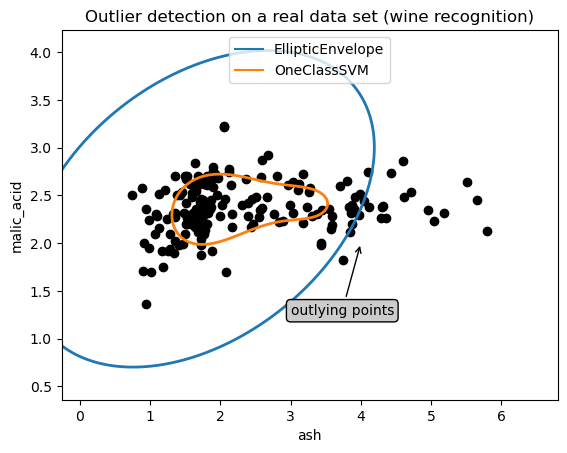

In [16]:
# Load dataset
X = load_wine()["data"][:, [1, 2]]  # two clusters

# Define estimators
estimators = {
    "EllipticEnvelope": EllipticEnvelope(),
    "OneClassSVM": OneClassSVM(gamma='auto')
}

# Create a mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
legend_lines = []

for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    Z = estimator.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors=color)
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))

# Plot data points
ax.scatter(X[:, 0], X[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
ax.legend(handles=legend_lines, loc="upper center")
_ = ax.set(
    xlabel="ash",
    ylabel="malic_acid",
    title="Outlier detection on a real data set (wine recognition)",
)

plt.show()